# Защита персональных данных клиентов

Нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.datasets import make_spd_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
pd.set_option('display.max_columns', 100)

In [2]:
df= pd.read_csv('/datasets/insurance.csv')

In [3]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Как видно пропусков нет, посмотрим как данные распределены

<AxesSubplot:>

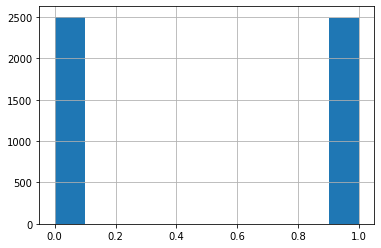

In [5]:
df['Пол'].hist()

<AxesSubplot:>

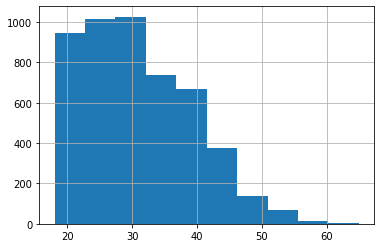

In [6]:
df['Возраст'].hist()

<AxesSubplot:>

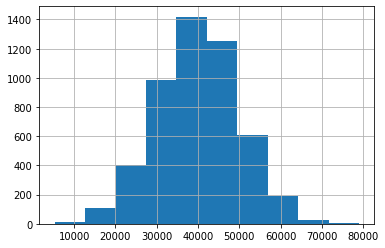

In [7]:
df['Зарплата'].hist()

<AxesSubplot:>

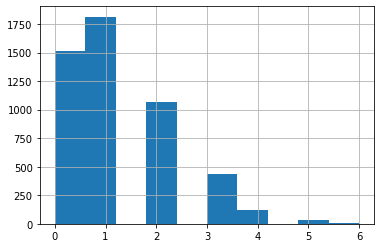

In [8]:
df['Члены семьи'].hist()

<AxesSubplot:>

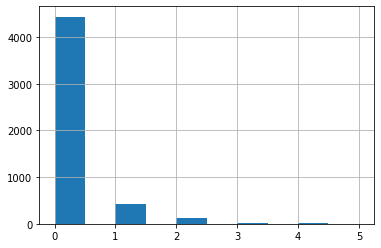

In [9]:
df['Страховые выплаты'].hist()

Посмотрим на корреляцию числовых признаков:

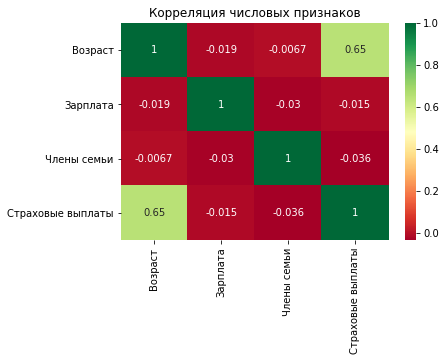

In [10]:
sns.heatmap(df[['Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']].corr(), cmap='RdYlGn', annot=True)
plt.title('Корреляция числовых признаков')
plt.show()

In [11]:
print('Количество дубликатов:', df.duplicated().sum())
print('Доля дубликатов:', df.duplicated().sum()/len(df)*100,'%')

Количество дубликатов: 153
Доля дубликатов: 3.06 %


Так как дубликатов очень мало, по этому их можно удалить

In [12]:
df= df.drop_duplicates()

In [13]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


### Вывод данные заполнены корректно, пропусков и аномальных значений не наблюдается. Значит обрабатывать данные не нужно

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Вопрос: Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

Ответ: Не изменится.

Обоснование:

Посмотрим как должен выглядеть расчет.

Подставим в формулу  $$ a = X1w   расчет   w = (X^T X)^{-1} X^T y $$

$$ a=X1*((X^T X)^{-1} X^T y) $$
Раскроем скобки, используя следующее свойство обратной матрицы: $$ (AB)^{-1}=B^{-1}A^{-1}$$
$$ a=X1*X^{-1}*(X^T)^{-1}*X^T*y $$
Преобразую вырожение используя следующие свойство Е-единичная матрица $$ X^T*X^{-1}=E$$ 
$$ a=X1*X^{-1}*Е*у=X1*X^{-1}*у $$
Теперь умножим матрицу на обратимую матрицу P:

$$ a1=(X1*P)((X*P)^T*(X*P))^{-1}*(X*P)^T*y $$ 
Раскроем скобки, используя свойство обратной матрицы: $$  (AB)^{-1}=B^{-1}A^{-1} $$  и свойство транспорнированной матрицы: $$ (AB)^T=B^T*A^T $$

$$ a1=(X1*P)*(X*P)^{-1}*((X*P)^T)^{-1}*(X*P)^T*y=(X1*P)*P^{-1}*X^{-1}*(X^T)^{-1}*(P^T)^{-1}*P^T*X^T*y=X1*P*P^{-1}*X*X^{-1}*(X^T)^{-1}*(P^T)^{-1}*P^T*X^T*y $$

Результатом умножения матрицы на обратную матрицу будет единичная мартица E:
$$ P*P^{-1}=E $$ 
$$(P^T)^{-1}*P^T=E  $$ 
$$(X^T)^{-1}*X^T=E $$
Преобразую вырожение

$$ a1=X1*E*X^{-1}*(X^T)^{-1}*E*X^T*y=X1*X^{-1}*(X^T)^{-1}*X^T*y=X1*X^{-1}*E*y=X1*X^{-1}*y $$

Получается a1=a



Для защиты информации умножим матрицу признаков на обратимую матрицу, которая генерируется случайным образом.

Этапы алгоритма:

Создание случайной матрицы размерностью n, где n- ширина матрицы признаков.

Проверка матрицы на обратимость.

Умножение матрицы признаков на случайную обратимую матрицу

Применение модели на преобразованных признаках

Обоснование

Матрица признаков имеет размерность m x n, где n- ширина матрицы, те количество признаков для регрессии. Случайная матрица должна быть квадратной размера nxn, тк обратимая матрица может быть только квадратной

Выделим признаки

In [14]:
df_features = df.drop('Страховые выплаты', axis=1)
df_target = df['Страховые выплаты']

### Создаем обратимую матрицу

В таблице признаков 4 признака. Значит необходимо создать случайную матрицу размера 4х4

In [15]:
random_matrix= np.random.normal(size =(4,4))
print(random_matrix)

[[ 1.26706064  1.22421705  0.21835987  1.48152609]
 [ 0.21019619  2.47116735  1.79534533 -1.15408966]
 [-0.44178028  0.13140961  0.06081529  0.9880662 ]
 [-0.60057818 -0.71131501 -0.82091273 -1.54951442]]


Проверим является ли она обратимой

In [16]:
invert = []

try:
    invert = np.linalg.inv(random_matrix)
    print('Матрица обратима')
except:
    random_matrix= np.random.normal(size =(4,4))
    invert = np.linalg.inv(random_matrix)
    print('Матрица не обратима,  заново сгенерировал матрицу')

print(invert)

Матрица обратима
[[ 0.23384528 -0.16565546 -1.14811621 -0.38514367]
 [ 0.64116911  0.30051847  0.77820088  0.88543706]
 [-0.86334848  0.08603924 -0.65666944 -1.30828286]
 [ 0.0724215  -0.1193309   0.4356564  -0.20943963]]


### Умножим матрицу с признаками на случайную обратимую матрицу

In [17]:
features_reversible=df_features@random_matrix
features_reversible.shape

(4847, 4)

In [18]:
features_reversible

,0,1,2,3
0,-21903.017484,6619.747335,3089.444894,48960.697786
1,-16778.582287,5106.527498,2392.745919,37491.877908
2,-9271.290242,2831.265627,1329.186064,20715.921570
3,-18419.024815,5530.252551,2572.057939,41175.025569
4,-11523.312818,3500.207679,1637.767048,25757.694799
...,...,...,...,...
4995,-15766.871747,4759.093072,2219.733628,35238.549750
4996,-23142.740709,6969.171850,3246.941924,51733.880243
4997,-14973.348808,4502.786438,2095.903347,33469.263310
4998,-14442.125594,4350.550145,2025.913139,32281.207704


In [19]:
df_features.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


## Алгоритм преобразования

### В исходных данных разделю выборки на обучающию и тестовую

In [20]:
print('df_features=',df_features.shape)
print('df_target=',df_target.shape)

df_features= (4847, 4)
df_target= (4847,)


In [21]:
features_train, features_test_valid, target_train, target_test_valid = train_test_split(df_features, df_target, 
                                                                              test_size=0.3, 
                                                                              random_state=12345)
print('features_train=',features_train.shape)
print('features_test_valid1=',features_test_valid.shape)
print('target_train=',target_train.shape)
print('target_test_valid1=',target_test_valid.shape)

features_train= (3392, 4)
features_test_valid1= (1455, 4)
target_train= (3392,)
target_test_valid1= (1455,)


Обучаю на 

         features_train 
 
         target_train

Тестирую на

            features_test_valid

            target_test_valid

### Напишу функцию линейной регрессии

In [22]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0 

In [23]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test_valid)
r2=r2_score(target_test_valid, predictions)
print('r2=',r2_score(target_test_valid, predictions))

r2= 0.43287552621918113


## Проверка алгоритма

Проверим наличие изминений после шифрования т.е умножение марицу  с признаками на обратимую матрицу

In [24]:
print(features_reversible.shape) 
print(df_target.shape)

(4847, 4)
(4847,)


### Данные с обратимой матрицей разделю  на обучающие и тестовые признаки

In [25]:
features_train2, features_test_valid2, target_train2, target_test_valid2 = train_test_split(features_reversible, df_target, 
                                                                              test_size=0.3, 
                                                                              random_state=12345)
print('features_train=',features_train2.shape)
print('features_test_valid1=',features_test_valid2.shape)
print('target_train=',target_train2.shape)
print('target_test_valid1=',target_test_valid2.shape)

features_train= (3392, 4)
features_test_valid1= (1455, 4)
target_train= (3392,)
target_test_valid1= (1455,)


In [26]:
model = LinearRegression()
model.fit(features_train2, target_train2)
predictions = model.predict(features_test_valid2)
r2__reversible=r2_score(target_test_valid2, predictions)
print(r2_score(target_test_valid2, predictions))

0.43287552626909775


### Проверю разницу R2 у исходных данных и данных которые зашифровал обратимой матрицой

In [27]:
delta=r2-r2__reversible
delta

-4.99166263878692e-11

## Заключение Метрика R2 изминилась не значительно Качество линейной ригрессии практически не изменилась на преобразованых(зашифрованых данных). Значит данные можно шифровать если подобрать обратную матрицу